In [1]:
import matplotlib.pyplot as plt
import modlamp.descriptors
import modlamp.analysis
import modlamp.sequences
import numpy as np
import numpy.ma as ma  
import pandas as pd
import csv
import random
import seaborn as sns
from joblib import load
from sklearn.model_selection import train_test_split
import amp.data_utils.data_loader as data_loader
from amp.config import MIN_LENGTH, MAX_LENGTH
from amp.data_utils.sequence import pad, to_one_hot
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

seed = 7

sns.set_style('whitegrid', {'grid.color': '.95', 'axes.spines.right': False, 'axes.spines.top': False})

params = {'axes.labelsize': 9,'axes.titlesize':9, 'font.size': 9, 'legend.fontsize': 9, 'xtick.labelsize': 9, 'ytick.labelsize': 9}
plt.rcParams.update(params)

Using TensorFlow backend.


# Amino acid composition

In [2]:
models = [
    'PepZOO',
]

model_labels = [
    'pepzoo',
]

pepzoo_color = '#B80018'

In [3]:
def get_aa_composition(data):
    STD_AA = list('ACDEFGHIKLMNPQRSTVWY')
    seq = ''.join(data)
    count = len(seq)

    aa_comp = {}
    for aa in STD_AA:
        aa_comp[aa] = seq.count(aa) / count
    return aa_comp

## amp_case1

In [5]:
wf = open('../results/PepZOO/amp/case1.csv','r')
wf_reader = csv.reader(wf)
next(wf_reader)
prototype_list = []
pepzoo_list = []

for row in wf_reader:
    _, t = row[0].split('_')
    if t == 'original':
        prototype_list.append(row[1])
    if t == 'PepZOO':
        pepzoo_list.append(row[1])

wf.close()

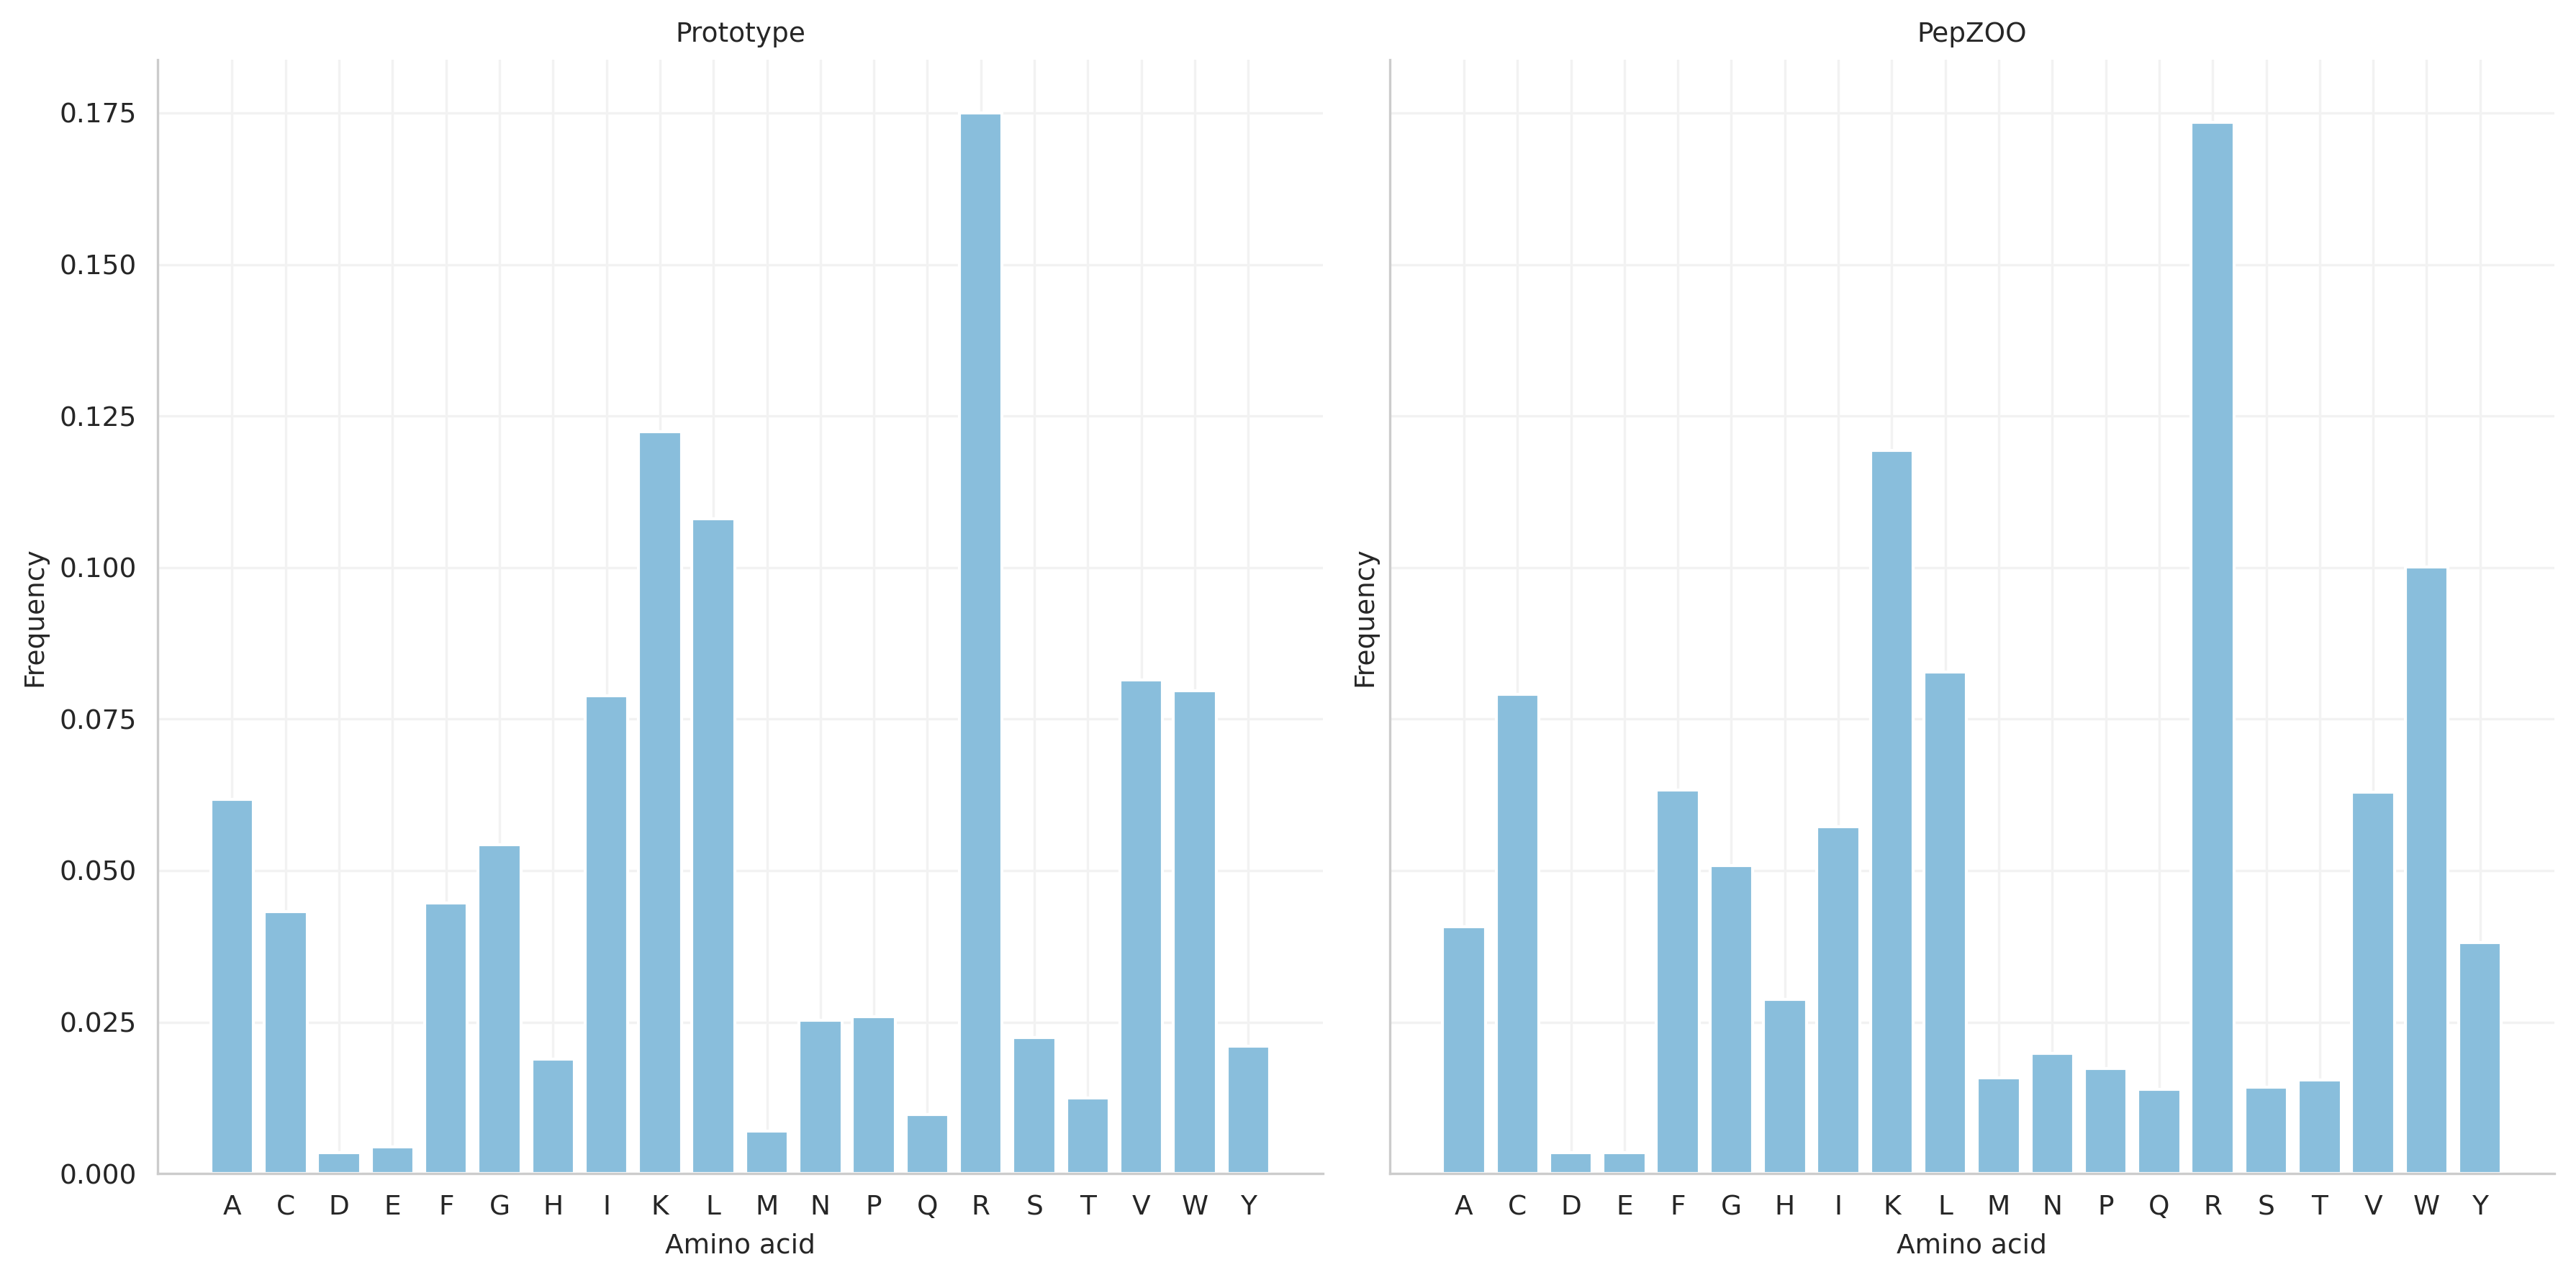

In [6]:
fig, ((ax1,ax2)) = plt.subplots(
    nrows=1,
    ncols=2, 
    figsize=(12, 6), 
    dpi=300, 
    sharey=True,
    # gridspec_kw={'width_ratios': [1, 2, 2, 2]}
)
aa_dict = {}
for i, (ax, data, title) in enumerate(zip(
    [ax1, ax2],
    [prototype_list, pepzoo_list],
    [
        'Prototype', 
        'PepZOO'
    ]
    )):
    aa_composition = get_aa_composition(data)
    aa_dict[f'{title}'] = aa_composition
    # clrs = ['firebrick' if (x in ['K', 'E', 'C', 'R', 'D']) else '#89bedc' for x in list(aa_composition.keys())]
    clrs = ['#89bedc' for x in list(aa_composition.keys())]
    ax.bar(x=list(aa_composition.keys()), height=list(aa_composition.values()), color=clrs)
    ax.set_title(title)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amino acid', x=0.5)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Amino acid', x=0.5)
fig.tight_layout()
plt.savefig('figure/amp/amp_case1_aacomposition.svg')

## amp_case2

In [7]:
wf = open('../results/PepZOO/amp/case2.csv','r')
wf_reader = csv.reader(wf)
next(wf_reader)
prototype_list = []
pepzoo_list = []

for row in wf_reader:
    _, t = row[0].split('_')
    if t == 'original':
        prototype_list.append(row[1])
    if t == 'PepZOO':
        pepzoo_list.append(row[1])

wf.close()

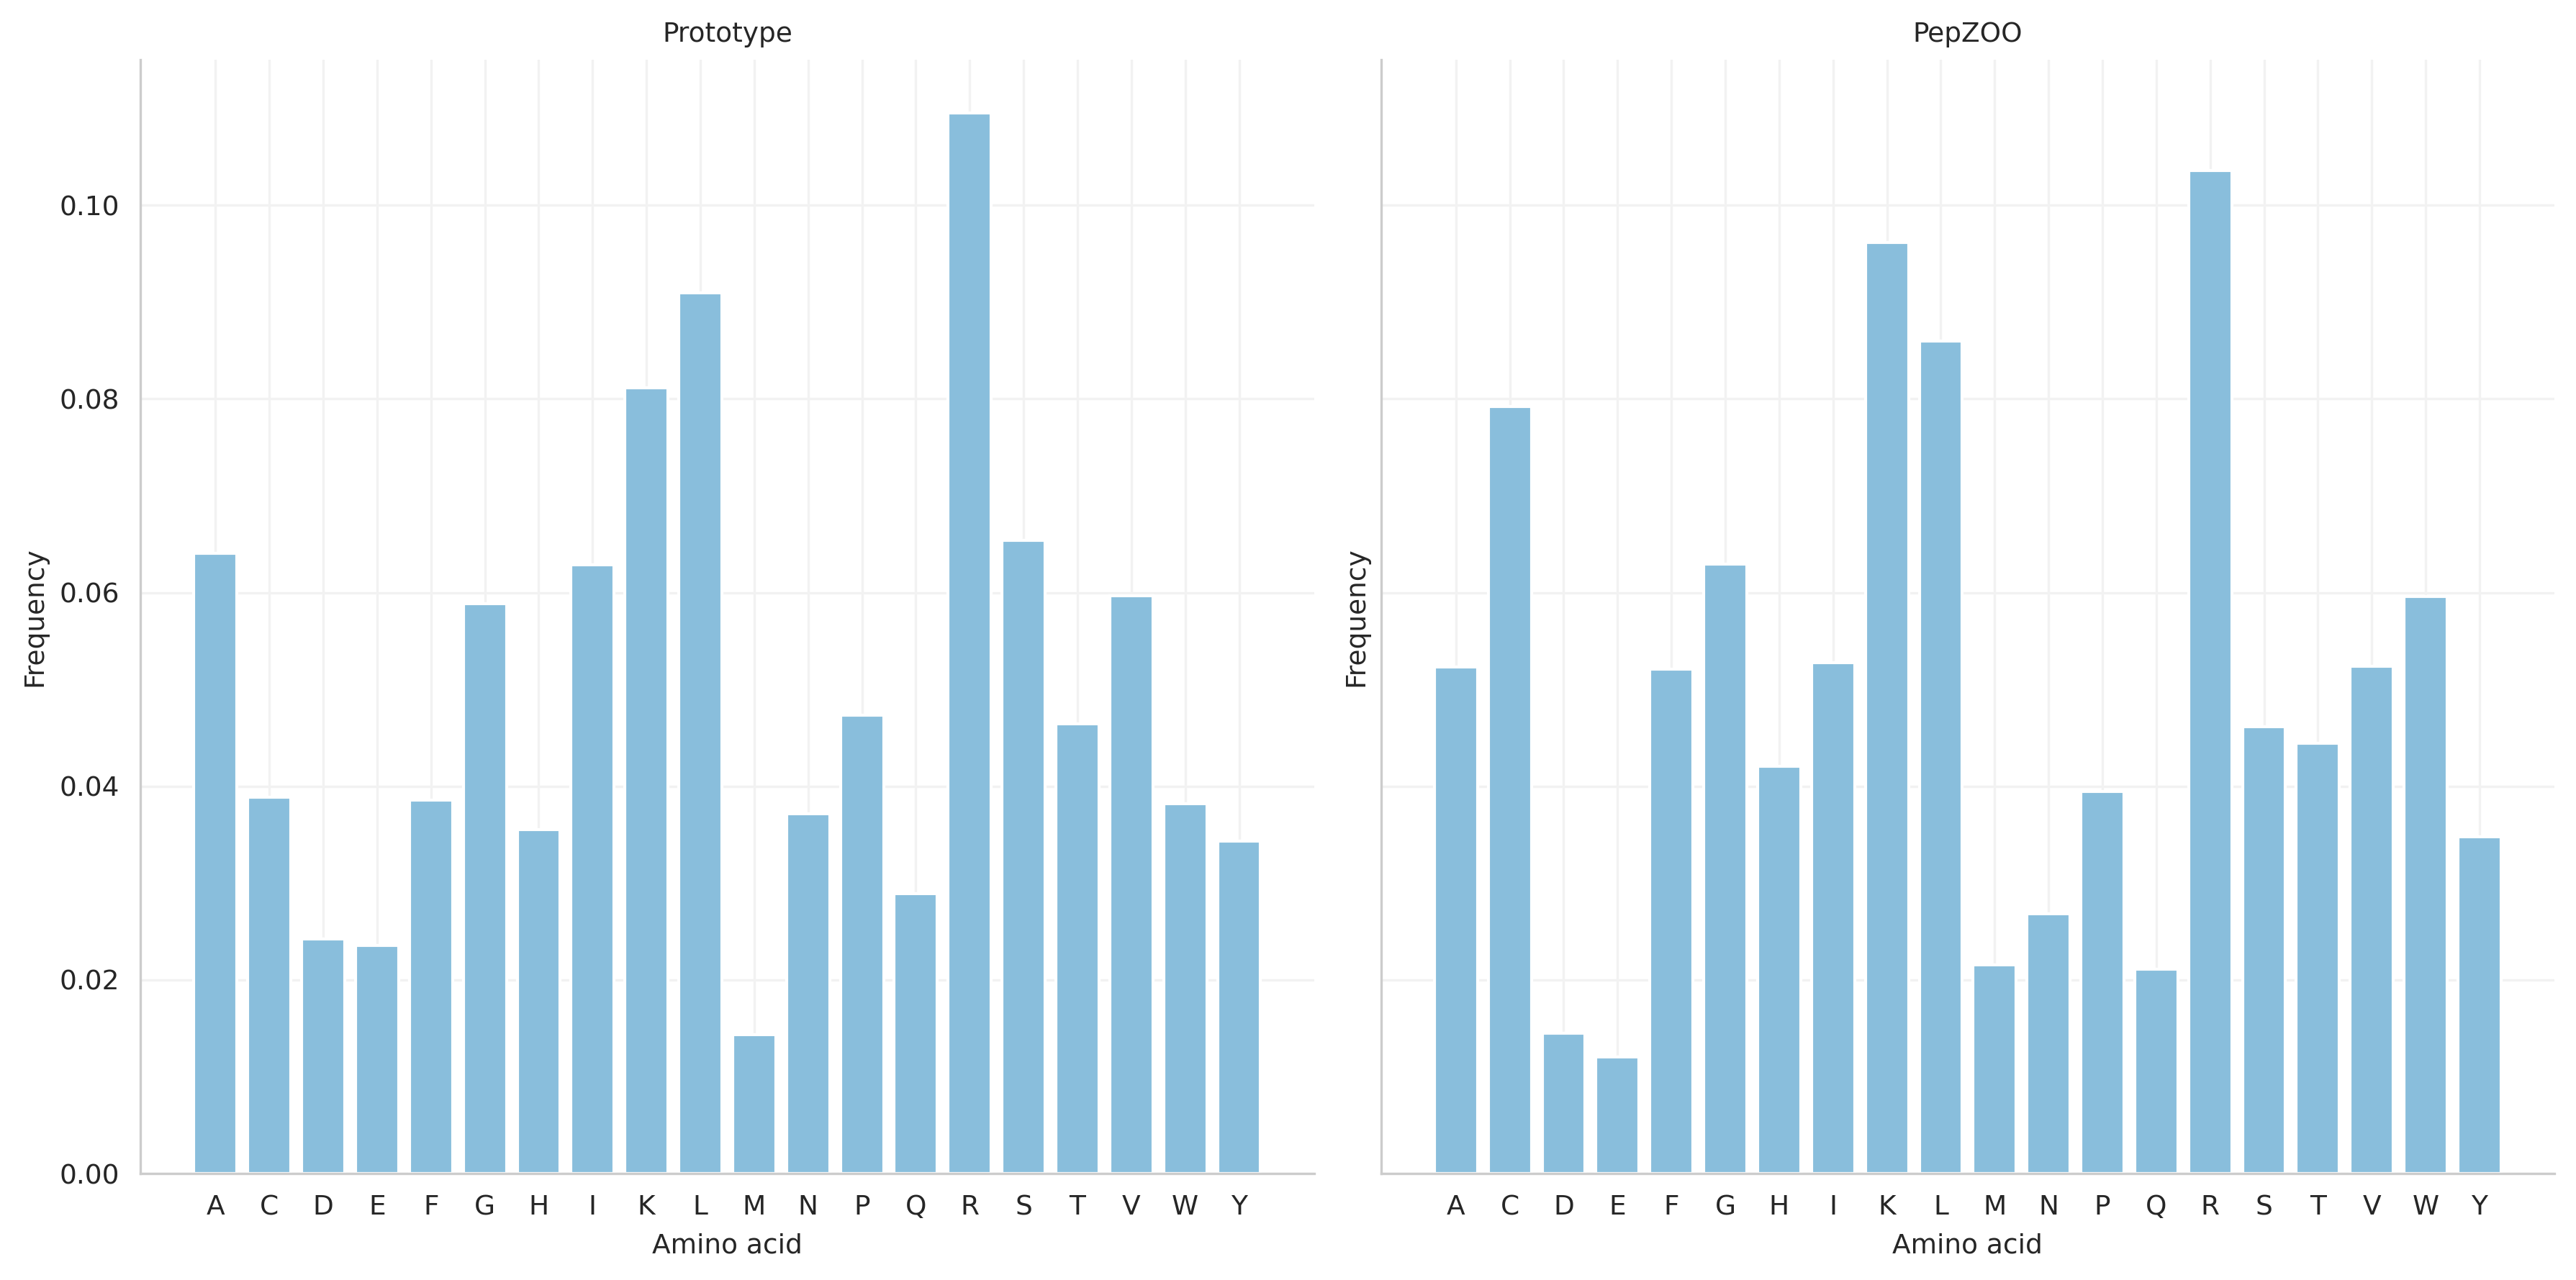

In [8]:
fig, ((ax1,ax2)) = plt.subplots(
    nrows=1,
    ncols=2, 
    figsize=(12, 6), 
    dpi=300, 
    sharey=True,
    # gridspec_kw={'width_ratios': [1, 2, 2, 2]}
)
aa_dict = {}
for i, (ax, data, title) in enumerate(zip(
    [ax1, ax2],
    [prototype_list, pepzoo_list],
    [
        'Prototype', 
        'PepZOO'
    ]
    )):
    aa_composition = get_aa_composition(data)
    aa_dict[f'{title}'] = aa_composition
    # clrs = ['firebrick' if (x in ['K', 'E', 'C', 'R', 'D']) else '#89bedc' for x in list(aa_composition.keys())]
    clrs = ['#89bedc' for x in list(aa_composition.keys())]
    ax.bar(x=list(aa_composition.keys()), height=list(aa_composition.values()), color=clrs)
    ax.set_title(title)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amino acid', x=0.5)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Amino acid', x=0.5)
fig.tight_layout()
plt.savefig('figure/amp/amp_case2_aacomposition.svg')

## amp_case3

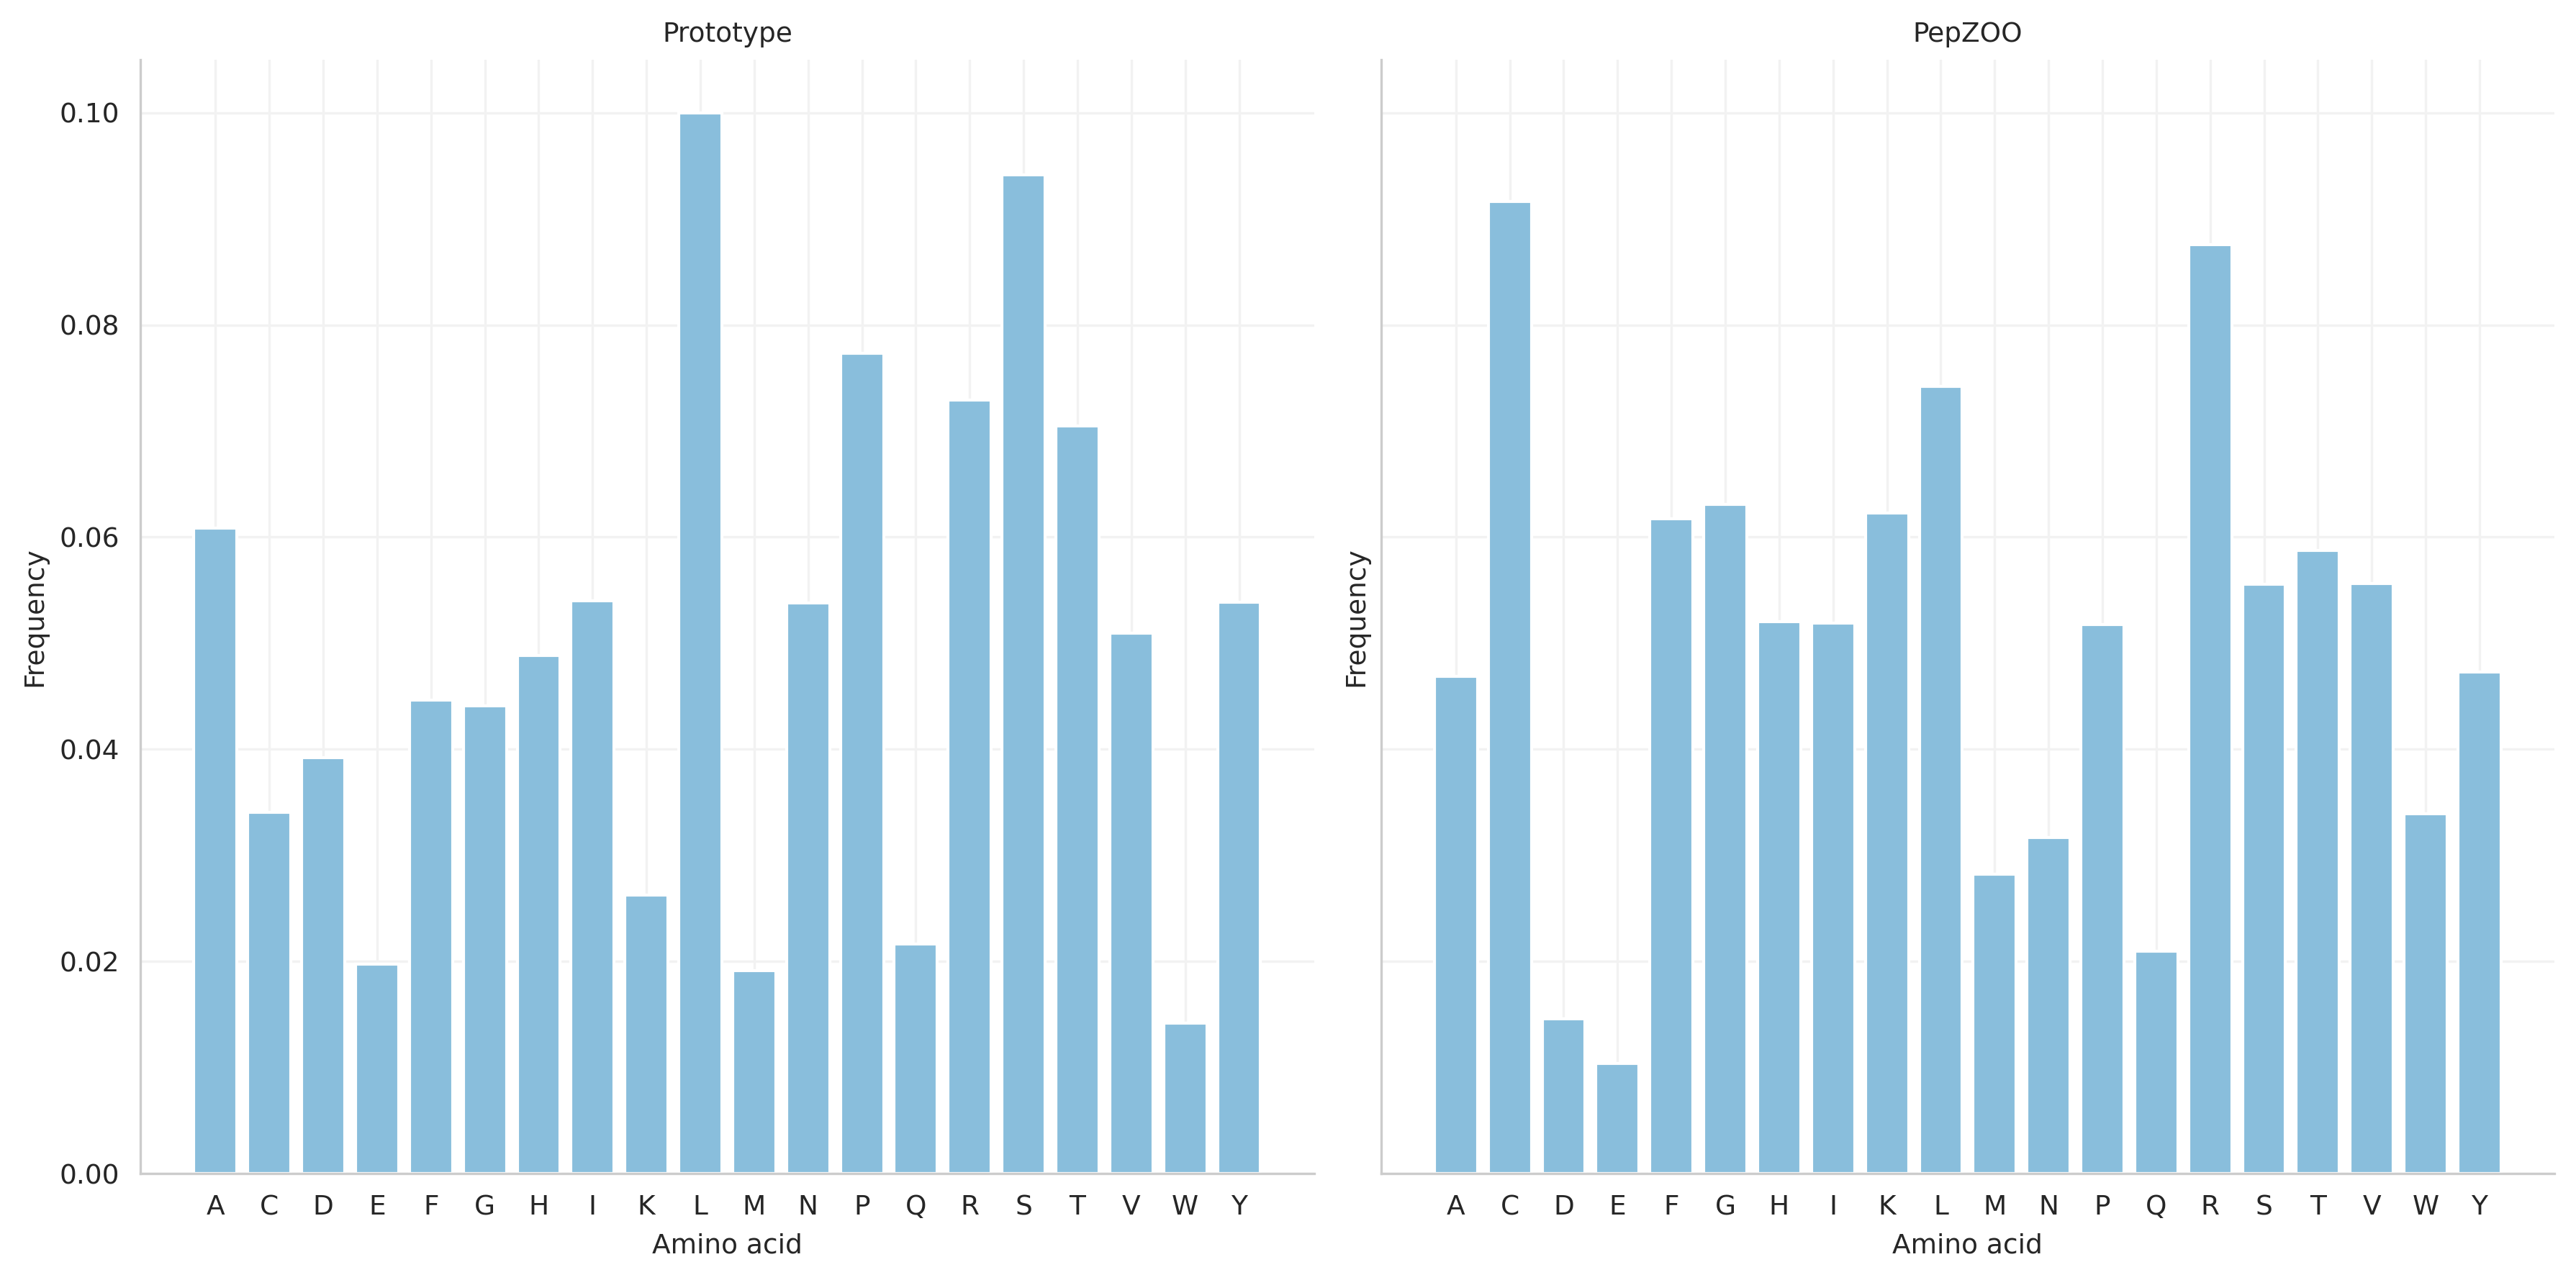

In [9]:
wf = open('../results/PepZOO/amp/case3.csv','r')
wf_reader = csv.reader(wf)
next(wf_reader)
prototype_list = []
pepzoo_list = []

for row in wf_reader:
    _, t = row[0].split('_')
    if t == 'original':
        prototype_list.append(row[1])
    if t == 'PepZOO':
        pepzoo_list.append(row[1])

wf.close()

fig, ((ax1,ax2)) = plt.subplots(
    nrows=1,
    ncols=2, 
    figsize=(12, 6), 
    dpi=300, 
    sharey=True,
    # gridspec_kw={'width_ratios': [1, 2, 2, 2]}
)
aa_dict = {}
for i, (ax, data, title) in enumerate(zip(
    [ax1, ax2],
    [prototype_list, pepzoo_list],
    [
        'Prototype', 
        'PepZOO'
    ]
    )):
    aa_composition = get_aa_composition(data)
    aa_dict[f'{title}'] = aa_composition
    # clrs = ['firebrick' if (x in ['K', 'E', 'C', 'R', 'D']) else '#89bedc' for x in list(aa_composition.keys())]
    clrs = ['#89bedc' for x in list(aa_composition.keys())]
    ax.bar(x=list(aa_composition.keys()), height=list(aa_composition.values()), color=clrs)
    ax.set_title(title)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amino acid', x=0.5)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Amino acid', x=0.5)
fig.tight_layout()
plt.savefig('figure/amp/amp_case3_aacomposition.svg')

## mic_case1

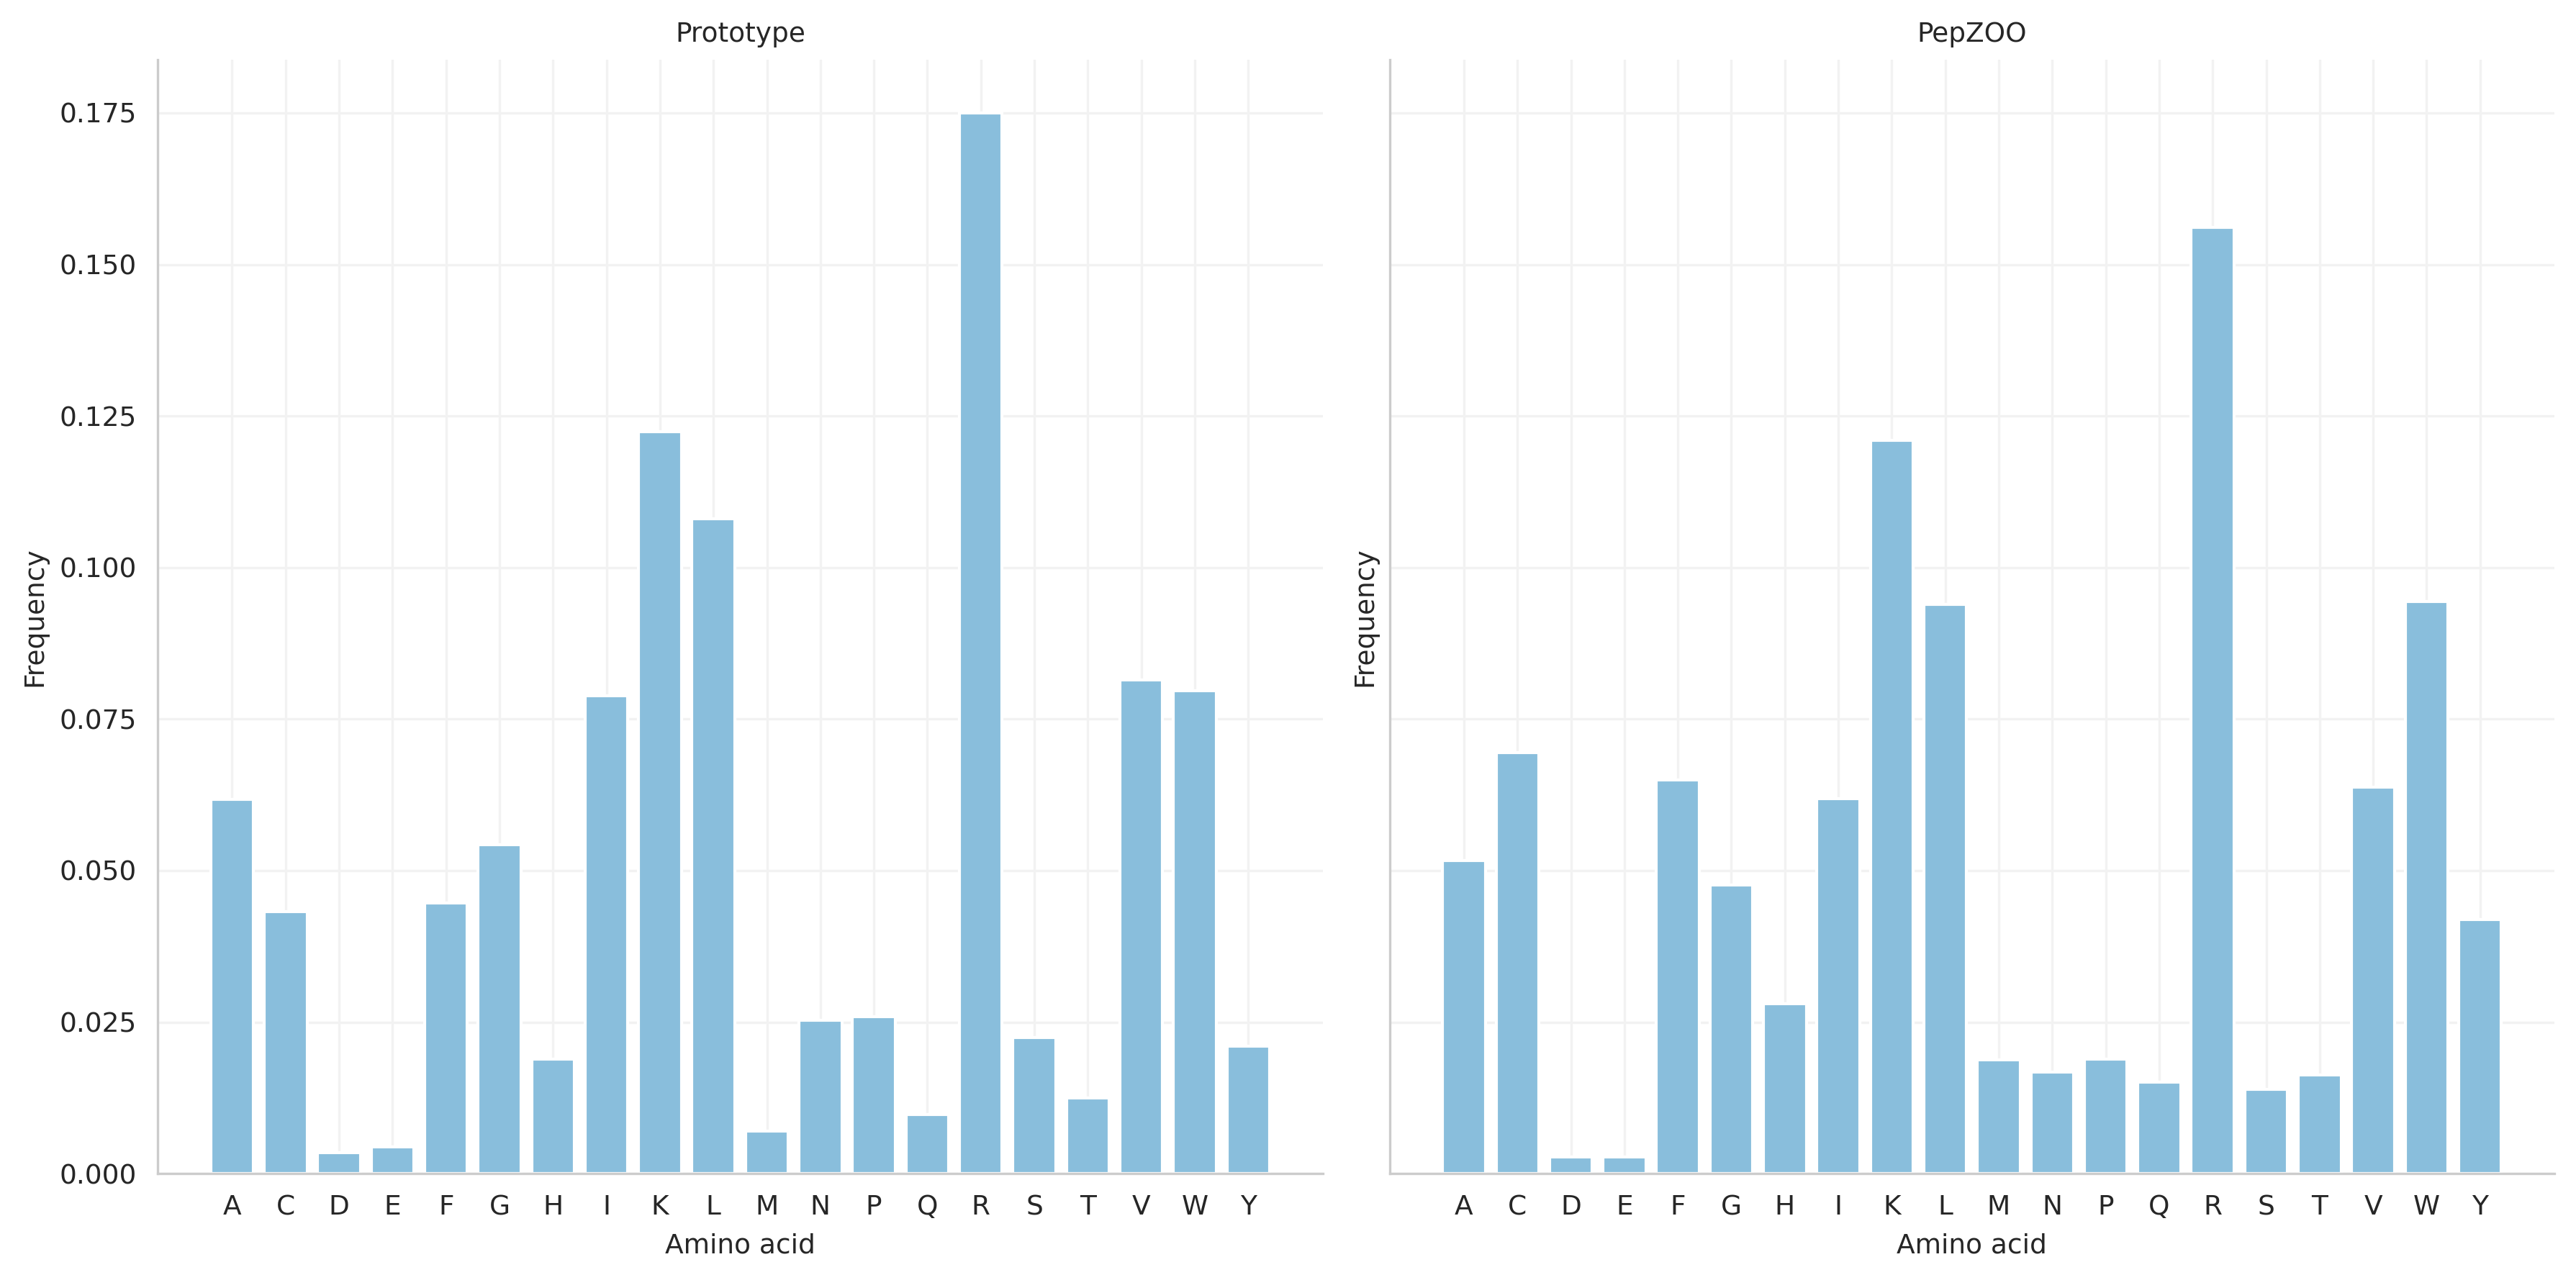

In [10]:
wf = open('../results/PepZOO/mic/case1.csv','r')
wf_reader = csv.reader(wf)
next(wf_reader)
prototype_list = []
pepzoo_list = []

for row in wf_reader:
    _, t = row[0].split('_')
    if t == 'original':
        prototype_list.append(row[1])
    if t == 'PepZOO':
        pepzoo_list.append(row[1])

wf.close()

fig, ((ax1,ax2)) = plt.subplots(
    nrows=1,
    ncols=2, 
    figsize=(12, 6), 
    dpi=300, 
    sharey=True,
    # gridspec_kw={'width_ratios': [1, 2, 2, 2]}
)
aa_dict = {}
for i, (ax, data, title) in enumerate(zip(
    [ax1, ax2],
    [prototype_list, pepzoo_list],
    [
        'Prototype', 
        'PepZOO'
    ]
    )):
    aa_composition = get_aa_composition(data)
    aa_dict[f'{title}'] = aa_composition
    # clrs = ['firebrick' if (x in ['K', 'E', 'C', 'R', 'D']) else '#89bedc' for x in list(aa_composition.keys())]
    clrs = ['#89bedc' for x in list(aa_composition.keys())]
    ax.bar(x=list(aa_composition.keys()), height=list(aa_composition.values()), color=clrs)
    ax.set_title(title)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amino acid', x=0.5)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Amino acid', x=0.5)
fig.tight_layout()
plt.savefig('figure/mic/mic_case1_aacomposition.pdf')

## mic_case2

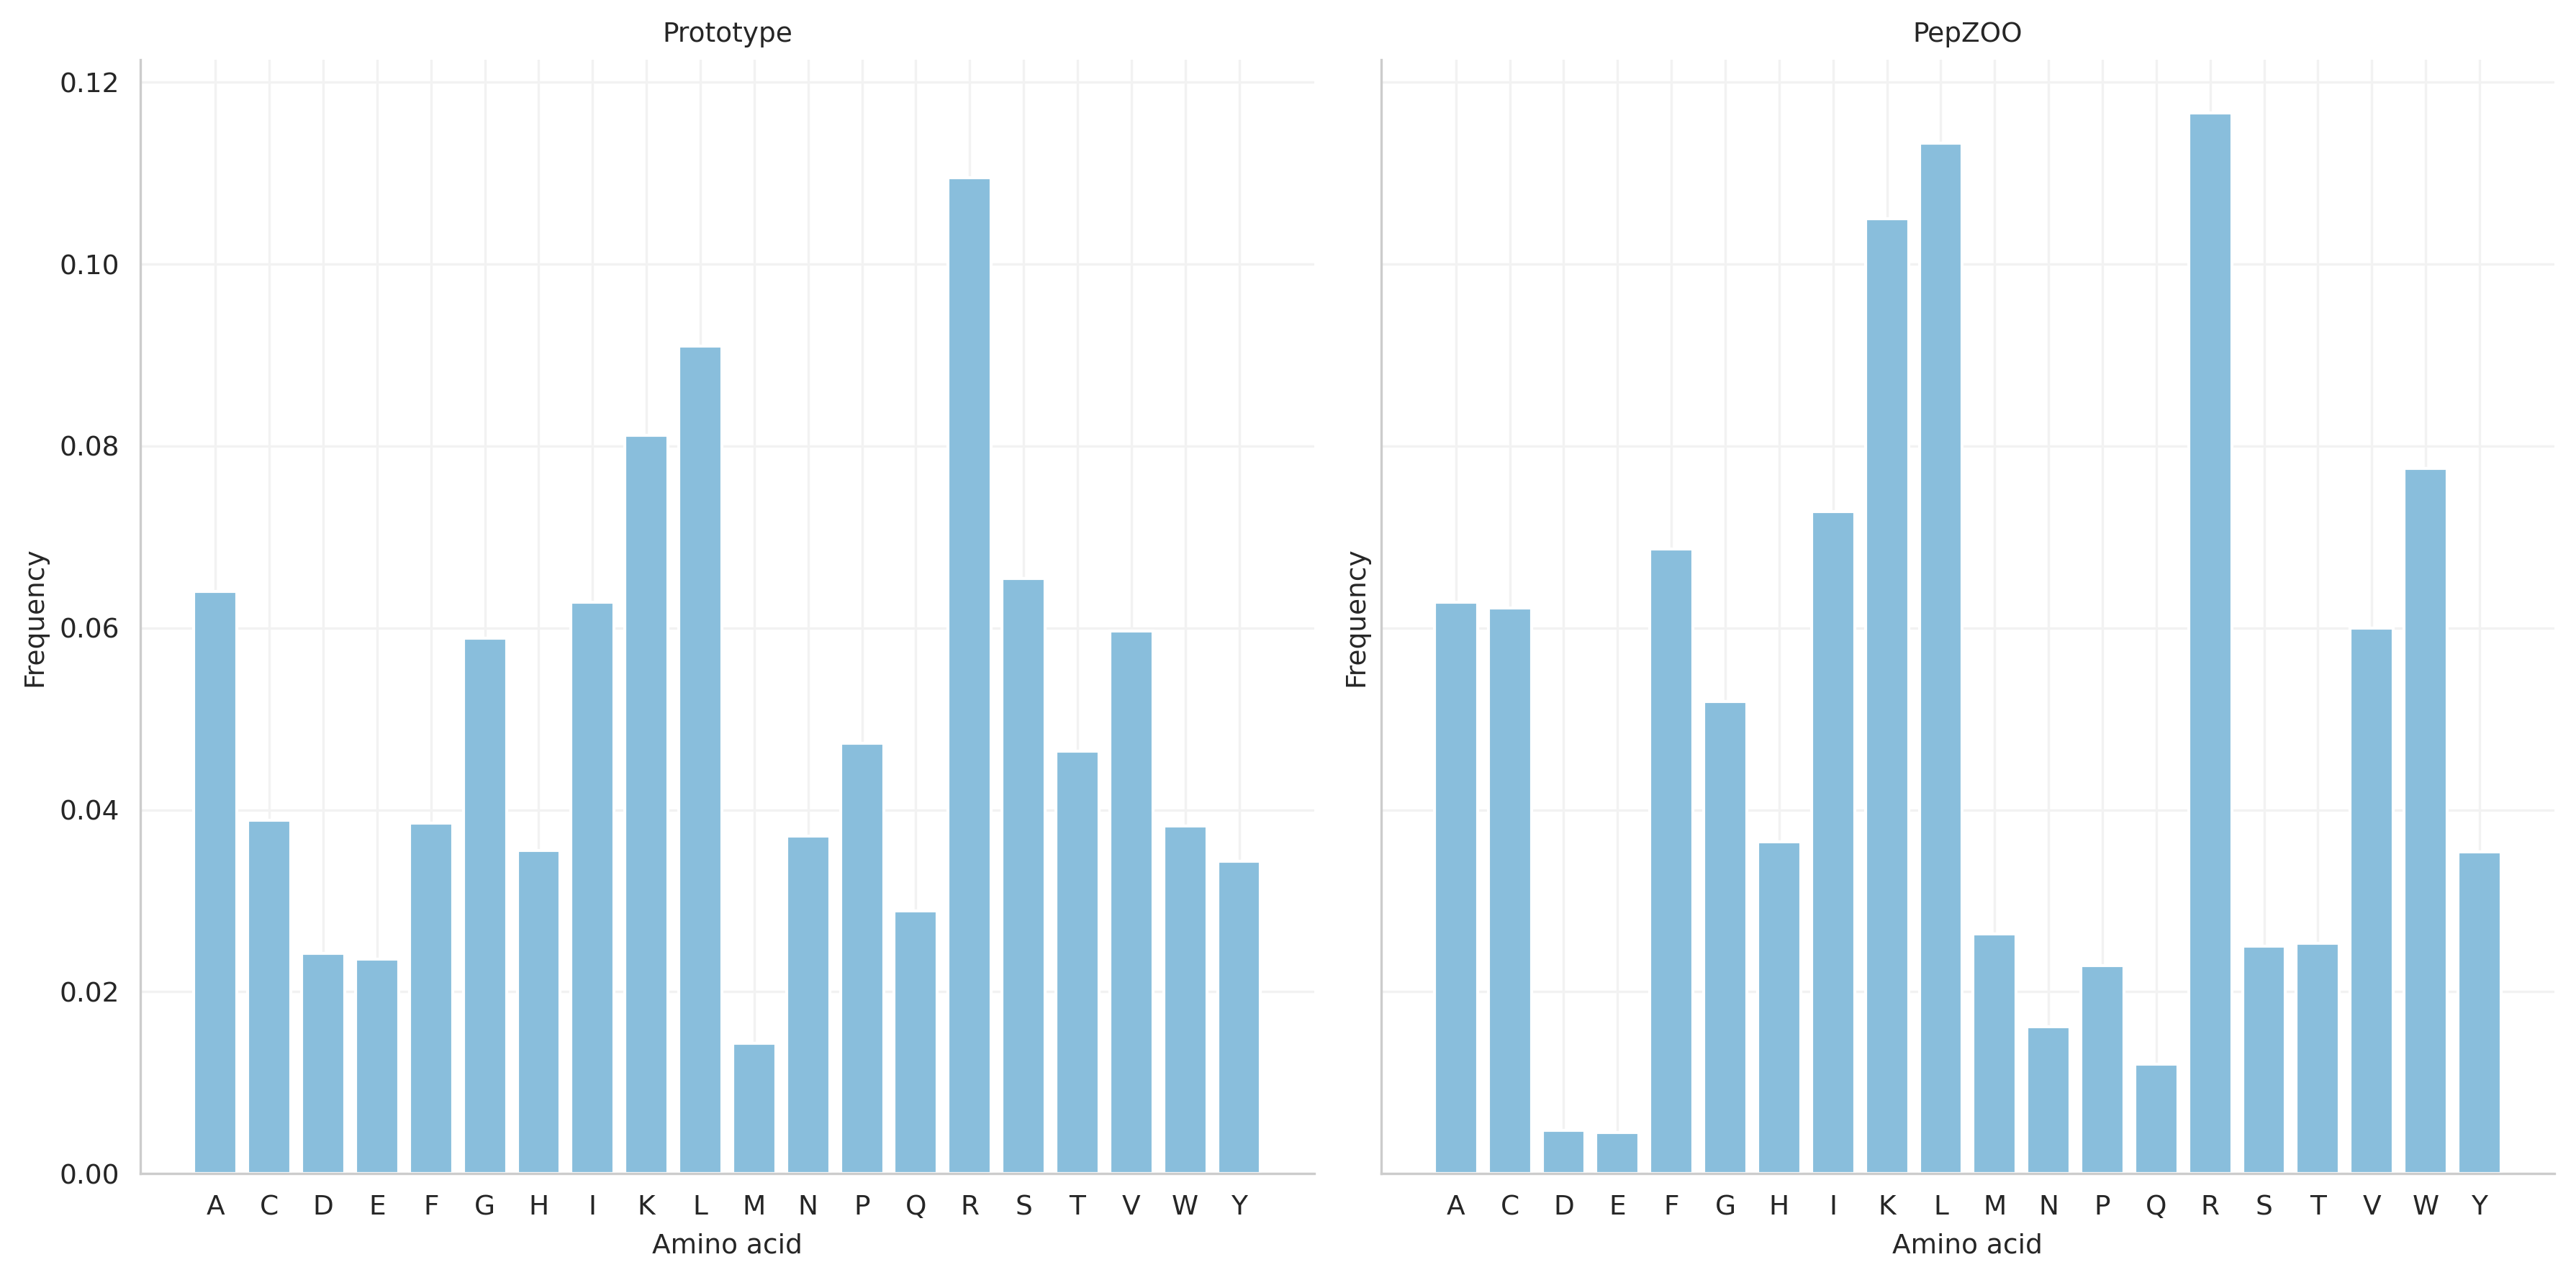

In [12]:
wf = open('../results/PepZOO/mic/case2.csv','r')
wf_reader = csv.reader(wf)
next(wf_reader)
prototype_list = []
pepzoo_list = []

for row in wf_reader:
    _, t = row[0].split('_')
    if t == 'original':
        prototype_list.append(row[1])
    if t == 'PepZOO':
        pepzoo_list.append(row[1])

wf.close()

fig, ((ax1,ax2)) = plt.subplots(
    nrows=1,
    ncols=2, 
    figsize=(12, 6), 
    dpi=300, 
    sharey=True,
    # gridspec_kw={'width_ratios': [1, 2, 2, 2]}
)
aa_dict = {}
for i, (ax, data, title) in enumerate(zip(
    [ax1, ax2],
    [prototype_list,pepzoo_list],
    [
        'Prototype', 
        'PepZOO'
    ]
    )):
    aa_composition = get_aa_composition(data)
    aa_dict[f'{title}'] = aa_composition
    # clrs = ['firebrick' if (x in ['K', 'E', 'C', 'R', 'D']) else '#89bedc' for x in list(aa_composition.keys())]
    clrs = ['#89bedc' for x in list(aa_composition.keys())]
    ax.bar(x=list(aa_composition.keys()), height=list(aa_composition.values()), color=clrs)
    ax.set_title(title)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amino acid', x=0.5)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Amino acid', x=0.5)
fig.tight_layout()
plt.savefig('figure/mic/mic_case2_aacomposition.pdf')

## mic_case3

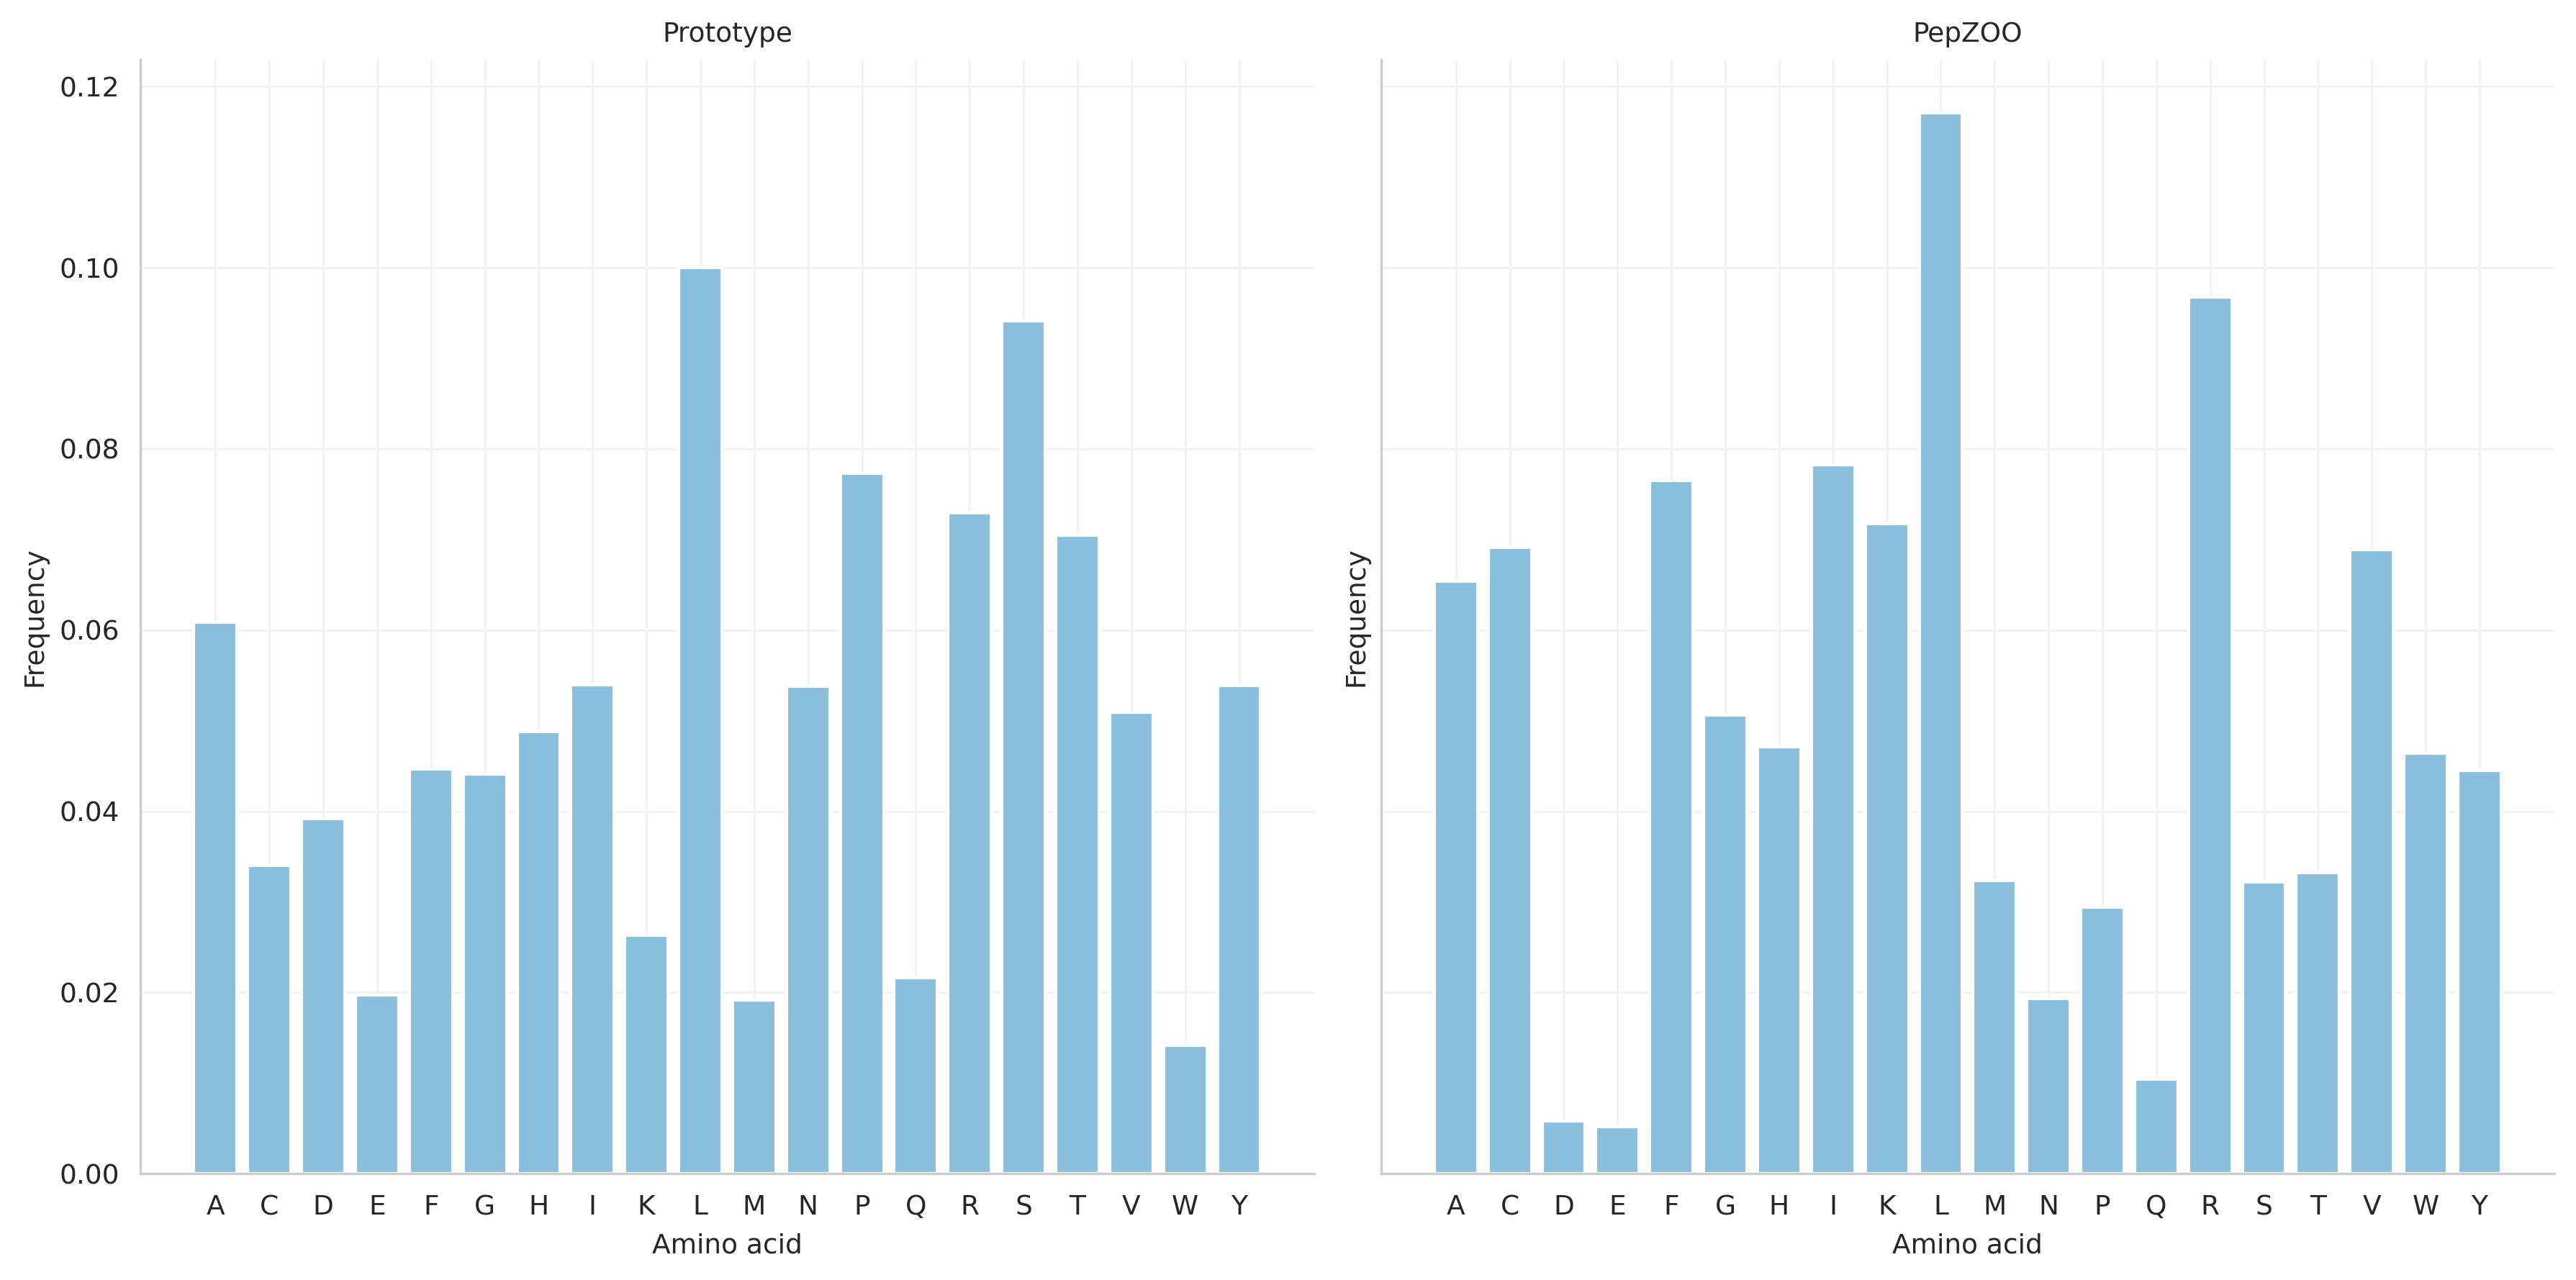

In [13]:
wf = open('../results/PepZOO/mic/case3.csv','r')
wf_reader = csv.reader(wf)
next(wf_reader)
prototype_list = []
pepzoo_list = []

for row in wf_reader:
    _, t = row[0].split('_')
    if t == 'original':
        prototype_list.append(row[1])
    if t == 'PepZOO':
        pepzoo_list.append(row[1])

wf.close()

fig, ((ax1,ax2)) = plt.subplots(
    nrows=1,
    ncols=2, 
    figsize=(12, 6), 
    dpi=300, 
    sharey=True,
    # gridspec_kw={'width_ratios': [1, 2, 2, 2]}
)
aa_dict = {}
for i, (ax, data, title) in enumerate(zip(
    [ax1, ax2],
    [prototype_list, pepzoo_list],
    [
        'Prototype', 
        'PepZOO'
    ]
    )):
    aa_composition = get_aa_composition(data)
    aa_dict[f'{title}'] = aa_composition
    # clrs = ['firebrick' if (x in ['K', 'E', 'C', 'R', 'D']) else '#89bedc' for x in list(aa_composition.keys())]
    clrs = ['#89bedc' for x in list(aa_composition.keys())]
    ax.bar(x=list(aa_composition.keys()), height=list(aa_composition.values()), color=clrs)
    ax.set_title(title)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amino acid', x=0.5)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Amino acid', x=0.5)
fig.tight_layout()
plt.savefig('figure/mic/mic_case3_aacomposition.pdf')